In [52]:
import pandas as pd 
from bs4 import BeautifulSoup 
import requests
import json
import re
import urllib
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Team URL Extraction
def build_team_urls():
    # Open the espn teams webpage and extract the names of each roster available.
    f = urllib.request.urlopen('http://www.espn.com/nba/teams')
    teams_source = f.read().decode('utf-8')
    teams = dict(re.findall("www\.espn\.com/nba/team/_/name/(\w+)/(.+?)\",", teams_source))
    # Using the names of the rosters, create the urls of each roster
    roster_urls = []
    for key in teams.keys():
        # each roster webpage follows this general pattern.
        roster_urls.append('http://www.espn.com/nba/team/roster/_/name/' + key + '/' + teams[key])
        teams[key] = str(teams[key])
    return dict(zip(teams.values(), roster_urls))
team_urls = build_team_urls()

In [3]:
#Extract Players basic information
def player_info(team_url):
    f = urllib.request.urlopen(team_url)
    teams_source = f.read().decode('utf-8')
    sleep(0.5)
    player_regex = ('"athletes":(.+?)"subType":')
    player = re.findall(player_regex, teams_source)[0]
    # Convert palyers to pandas dataframe
    return pd.read_json(player[1:-4], lines=True)

In [4]:
team_urls.values()

dict_values(['http://www.espn.com/nba/team/roster/_/name/bos/boston-celtics', 'http://www.espn.com/nba/team/roster/_/name/bkn/brooklyn-nets', 'http://www.espn.com/nba/team/roster/_/name/ny/new-york-knicks', 'http://www.espn.com/nba/team/roster/_/name/phi/philadelphia-76ers', 'http://www.espn.com/nba/team/roster/_/name/tor/toronto-raptors', 'http://www.espn.com/nba/team/roster/_/name/chi/chicago-bulls', 'http://www.espn.com/nba/team/roster/_/name/cle/cleveland-cavaliers', 'http://www.espn.com/nba/team/roster/_/name/det/detroit-pistons', 'http://www.espn.com/nba/team/roster/_/name/ind/indiana-pacers', 'http://www.espn.com/nba/team/roster/_/name/mil/milwaukee-bucks', 'http://www.espn.com/nba/team/roster/_/name/atl/atlanta-hawks', 'http://www.espn.com/nba/team/roster/_/name/cha/charlotte-hornets', 'http://www.espn.com/nba/team/roster/_/name/mia/miami-heat', 'http://www.espn.com/nba/team/roster/_/name/orl/orlando-magic', 'http://www.espn.com/nba/team/roster/_/name/wsh/washington-wizards', '

In [5]:
all_players_df= []
for url in team_urls.values():
    all_players_df.append(player_info(url))
all_players_df = pd.concat(all_players_df)

In [30]:
all_players_df = all_players_df.reset_index().drop(columns = ['index'])

,name,href,uid,guid,id,height,weight,age,position,jersey,salary,birthDate,headshot,lastName,experience,college,birthPlace,hand
0,Jaylen Brown,https://www.espn.com/nba/player/_/id/3917376/j...,s:40~l:46~a:3917376,0d5cde01f6d3225fdae544ef3304cda2,3917376,"6' 6""",223 lbs,23,SG,7.0,"$6,534,829",10/24/96,https://a.espncdn.com/i/headshots/nba/players/...,Jaylen Brown,4,California,"Marietta, GA",NaN
1,Carsen Edwards,https://www.espn.com/nba/player/_/id/4066407/c...,s:40~l:46~a:4066407,4b8ebdfd01221567925035c1e0d0c337,4066407,"5' 11""",200 lbs,22,PG,4.0,"$1,228,026",03/12/98,https://a.espncdn.com/i/headshots/nba/players/...,Carsen Edwards,1,Purdue,"Houston, TX",NaN
2,Tacko Fall,https://www.espn.com/nba/player/_/id/3904625/t...,s:40~l:46~a:3904625,cec7bd80fe2880fe8d9efe9a2294a563,3904625,"7' 5""",311 lbs,24,C,99.0,0,12/10/95,https://a.espncdn.com/i/headshots/nba/players/...,Tacko Fall,1,UCF,Senegal,NaN
3,Javonte Green,https://www.espn.com/nba/player/_/id/2596112/j...,s:40~l:46~a:2596112,a4940ed033e0a114e8862f5a094aa3f8,2596112,"6' 4""",205 lbs,27,SG,43.0,"$898,310",07/23/93,https://a.espncdn.com/i/headshots/nba/players/...,Javonte Green,1,Radford,"Alberta, VA",NaN
4,Gordon Hayward,https://www.espn.com/nba/player/_/id/4249/gord...,s:40~l:46~a:4249,56f675cb8f40a5aaee5f5747ec9099c5,4249,"6' 7""",225 lbs,30,SF,20.0,"$32,700,690",03/23/90,https://a.espncdn.com/i/headshots/nba/players/...,Gordon Hayward,10,Butler,"Indianapolis, IN",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Luka Samanic,https://www.espn.com/nba/player/_/id/4423309/l...,s:40~l:46~a:4423309,bc9995ea4b1a9782ef30b0a4d7299aad,4423309,"6' 10""",227 lbs,20,PF,19.0,"$2,689,920",01/09/00,https://a.espncdn.com/i/headshots/nba/players/...,Luka Samanic,1,NaN,Croatia,NaN
502,Lonnie Walker IV,https://www.espn.com/nba/player/_/id/4277890/l...,s:40~l:46~a:4277890,b728fc4662fe032160f7659e2e05f4c4,4277890,"6' 5""",204 lbs,21,SG,1.0,"$2,689,920",12/14/98,https://a.espncdn.com/i/headshots/nba/players/...,Lonnie Walker IV,2,Miami (FL),"Reading, PA",L
503,Quinndary Weatherspoon,https://www.espn.com/nba/player/_/id/3907358/q...,s:40~l:46~a:3907358,f40458f631cee819bf79e83079dc3aac,3907358,"6' 3""",205 lbs,24,SG,15.0,0,09/10/96,https://a.espncdn.com/i/headshots/nba/players/...,Quinndary Weatherspoon,1,Mississippi State,"Canton, MS",NaN
504,Derrick White,https://www.espn.com/nba/player/_/id/3078576/d...,s:40~l:46~a:3078576,8aba42b74c1e6ccd315097691c299668,3078576,"6' 4""",190 lbs,26,PG,4.0,"$1,948,080",07/02/94,https://a.espncdn.com/i/headshots/nba/players/...,Derrick White,3,Colorado,USA,NaN


In [11]:
from itertools import chain

In [12]:
career_stats_df = pd.DataFrame(columns = ["GP","GS","MIN","FGM", "FGA","FG%","3PTM",
                                          "3PTA","3P%","FTM","FTA","FT%","OR","DR",
                                          "REB","AST","BLK","STL","PF","TO","PTS"])
# Performance score
for player_index in all_players_df.index:
    url = "https://www.espn.com/nba/player/stats/_/id/" + str(all_players_df.iloc[player_index]['id'])
    f = urllib.request.urlopen(url)
    sleep(0.3)
    player_source = f.read().decode('utf-8')
    # extract career stats using this regex
    stats_regex = ('\[\"Career\",\"\",(.*?)\]\},\{\"ttl\"\:\"Regular Season Totals\"')
    career_info = re.findall(stats_regex, player_source)
    try:
        # convert the stats to a list of floats, and add the entry to the DataFrame
        career_info = career_info[0].replace("\"", "").split(",")
        career_info = list(chain.from_iterable([i.split("-") for i in career_info]))
        career_info = list(map(float,career_info))
        career_stats_df = career_stats_df.append(pd.Series(career_info, index = career_stats_df.columns, name=player_index))
    except:
        # if no career stats were returned, the player was a rookie with no games played
        print(str(player_index) + " has no info, ", end = "")

In [31]:
career_stats_df = career_stats_df.reset_index().drop(columns = ['index'])

In [32]:
# join and clean the data
all_stats_df = all_players_df.join(career_stats_df)
def convert_height(height):
    split_height = height.split(" ")
    feet = float(split_height[0].replace("\'",""))
    inches = float(split_height[1].replace("\"",""))
    return (feet*12 + inches)
all_stats_df['height'] = [convert_height(x) for x in all_stats_df['height']]
all_stats_df['weight'] = [float(x.split(" ")[0]) for x in all_stats_df['weight']]
all_stats_df['salary'] = [int(re.sub(r'[^\d.]+', '', s)) if isinstance(s, str) else s for s in all_stats_df['salary'].values]



In [27]:
#all_stats_df.to_csv("data.csv")

In [35]:
all_stats_df = all_stats_df.reset_index().drop(columns=['index'])

# Analysis 

In [44]:
def month_extract(s):
    return s.split('/')[0]

In [50]:
month_distribution = all_stats_df['birthDate'].apply(month_extract).astype(int).value_counts().reset_index()

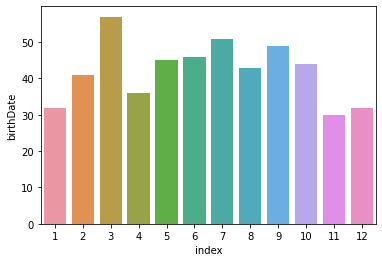

In [54]:
sns.barplot(x= 'index',y = 'birthDate',data=month_distribution,ci=None)

The month is evenly distributed. Thus, the month is not a factor of being an NBA players.

# Physical Attributes

In [169]:
physical_att = all_stats_df[['name','height','weight','position','age','GP','GS', 'MIN', 'FGM',
       'FGA', 'FG%', '3PTM', '3PTA', '3P%', 'FTM', 'FTA', 'FT%', 'OR', 'DR',
       'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS']]

In [197]:
from sklearn.linear_model import LinearRegression, LogisticRegression,Lasso,Ridge
X = physical_att[['height','weight']]
y = physical_att['3P%']
reg = LinearRegression().fit(X, y)

In [189]:
for target in ['GP','GS', 'MIN', 'FGM',
       'FGA', 'FG%', '3PTM', '3PTA', '3P%', 'FTM', 'FTA', 'FT%', 'OR', 'DR',
       'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS']:
    y = physical_att[target]
    reg = LinearRegression().fit(X, y)
    print(reg.coef_)
    print("target variable {0}: {1}".format(target,reg.score(X,y)*100))

[ 7.09950309 -0.88857395]
target variable GP: 0.4733358679908761
[ 3.09982333 -0.27092483]
target variable GS: 0.1443642178214688
[ 0.08882701 -0.01987042]
target variable MIN: 0.1161607597916614
[ 0.04166701 -0.00421009]
target variable FGM: 0.2010936095380722
[ 0.07256422 -0.00965066]
target variable FGA: 0.13235502103038366
[-0.01580042  0.06363979]
target variable FG%: 1.466671020105037
[-0.0007623  -0.00026521]
target variable 3PTM: 0.015829400725253517
[-0.00649278 -0.00109399]
target variable 3PTA: 0.062082139439634254
[ 0.25373432 -0.07541654]
target variable 3P%: 1.0445533409753738
[ 0.01249523 -0.00144384]
target variable FTM: 0.05636104997276403
[ 0.01752379 -0.00198081]
target variable FTA: 0.07497761479274834
[ 0.07149129 -0.05037268]
target variable FT%: 0.5490785395448339
[ 0.03052679 -0.00449831]
target variable OR: 1.1923411657264738
[ 0.03524019 -0.00396113]
target variable DR: 0.3569712422476168
[ 0.06578684 -0.00854241]
target variable REB: 0.6726753891109549
[-0.01

In [193]:
for target in ['GP','GS', 'MIN', 'FGM',
       'FGA', 'FG%', '3PTM', '3PTA', '3P%', 'FTM', 'FTA', 'FT%', 'OR', 'DR',
       'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS']: 
    y = physical_att[target]
    clf = Lasso(alpha=0.1).fit(X, y)
    print(clf.coef_)
    print("target variable {0}: {1}".format(target,clf.score(X,y)*100))


[ 7.07529008 -0.88583635]
target variable GP: 0.4733305720165726
[ 3.07564244 -0.26819064]
target variable GS: 0.14435573825136716
[ 0.06490074 -0.01716319]
target variable MIN: 0.1130529979605166
[ 0.01774719 -0.00150355]
target variable FGM: 0.13458242762035555
[ 0.04863908 -0.00694355]
target variable FGA: 0.1190869268389183
[-0.          0.06179306]
target variable FG%: 1.4658948661275595
[-0.         -0.00017242]
target variable 3PTM: 0.011402492459278157
[-0.         -0.00160803]
target variable 3PTA: 0.05557137087173203
[ 0.22979287 -0.07270771]
target variable 3P%: 1.0428705990289555
[ 0. -0.]
target variable FTM: 0.0
[ 0. -0.]
target variable FTA: 0.0
[ 0.0475673  -0.04766569]
target variable FT%: 0.5477235440671024
[ 0.00660776 -0.00179184]
target variable OR: 0.5855227467840174
[ 0.01132061 -0.00125461]
target variable DR: 0.19230028003025534
[ 0.04186278 -0.00583542]
target variable REB: 0.589107869288652
[-0.          0.00021766]
target variable AST: 0.003343258650112535
[

In [199]:
for target in ['GP','GS', 'MIN', 'FGM',
       'FGA', 'FG%', '3PTM', '3PTA', '3P%', 'FTM', 'FTA', 'FT%', 'OR', 'DR',
       'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS']: 
    y = physical_att[target]
    clf = Ridge(alpha=0.1).fit(X, y)
    print(clf.coef_)
    print("target variable {0}: {1}".format(target,clf.score(X,y)*100))



[ 7.09919563 -0.88854108]
target variable GP: 0.47333586714225495
[ 3.09968962 -0.27091058]
target variable GS: 0.14436421756380824
[ 0.08882313 -0.01987   ]
target variable MIN: 0.11616075971015993
[ 0.04166521 -0.0042099 ]
target variable FGM: 0.20109360916387153
[ 0.07256108 -0.00965032]
target variable FGA: 0.1323550208025659
[-0.01579946  0.06363966]
target variable FG%: 1.4666710201020172
[-0.00076227 -0.00026522]
target variable 3PTM: 0.015829400724254317
[-0.0064925  -0.00109402]
target variable 3PTA: 0.062082139429087135
[ 0.25372313 -0.07541533]
target variable 3P%: 1.0445533406101548
[ 0.01249469 -0.00144378]
target variable FTM: 0.056361049868480784
[ 0.01752304 -0.00198073]
target variable FTA: 0.07497761465334873
[ 0.07148801 -0.05037231]
target variable FT%: 0.5490785395193876
[ 0.03052547 -0.00449816]
target variable OR: 1.1923411638758874
[ 0.03523867 -0.00396096]
target variable DR: 0.35697124158331484
[ 0.06578399 -0.00854211]
target variable REB: 0.6726753879322089


In [185]:
from sklearn.svm import LinearSVR

In [186]:
for target in ['GP','GS', 'MIN', 'FGM',
       'FGA', 'FG%', '3PTM', '3PTA', '3P%', 'FTM', 'FTA', 'FT%', 'OR', 'DR',
       'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS']:
    try: 
        y = physical_att[target]
        clf = LinearSVR(random_state=0, tol=1e-5).fit(X, y)
        print("target variable {0}: {1}".format(target,clf.score(X,y)*100))
    except: 
        print(target)



/Users/yi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/yi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/yi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/yi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/yi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed t

target variable GP: -27.580078820910224
target variable GS: -43.96618763748093
target variable MIN: -14.54567657568937
target variable FGM: -89.79477585277974
target variable FGA: -81.81024548752158
target variable FG%: -1.0764185435081508
target variable 3PTM: -60.131921281156565
target variable 3PTA: -26.93274463387332
target variable 3P%: -17.192309877031732
target variable FTM: -72.76006906875725
target variable FTA: -74.84747327508703
target variable FT%: -3.789041394156345
target variable OR: -4.144011648561574
target variable DR: -45.320587538607796
target variable REB: -15.77580695877221
target variable AST: -21.216450355043225
target variable BLK: -24.144325284180866
target variable STL: -49.05891553195361
target variable PF: -229.95583453626062
target variable TO: -40.6892278148826
target variable PTS: -89.99789600289077


/Users/yi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/yi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/yi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/yi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/yi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed t

## NBA Player similarity

In [55]:
from sklearn import cluster

In [57]:
all_stats_df.columns

Index(['name', 'href', 'uid', 'guid', 'id', 'height', 'weight', 'age',
       'position', 'jersey', 'salary', 'birthDate', 'headshot', 'lastName',
       'experience', 'college', 'birthPlace', 'hand', 'GP', 'GS', 'MIN', 'FGM',
       'FGA', 'FG%', '3PTM', '3PTA', '3P%', 'FTM', 'FTA', 'FT%', 'OR', 'DR',
       'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS'],
      dtype='object')

In [61]:
all_stats_df['GP']

0      279.0
1      279.0
2      279.0
3      279.0
4      279.0
       ...  
501    279.0
502     37.0
503     37.0
504      7.0
505     48.0
Name: GP, Length: 506, dtype: float64

In [63]:
all_stats_df[all_stats_df['name'] == 'OG Anunoby']

,name,href,uid,guid,id,height,weight,age,position,jersey,...,FT%,OR,DR,REB,AST,BLK,STL,PF,TO,PTS
4,OG Anunoby,https://www.espn.com/nba/player/_/id/3934719/o...,s:40~l:46~a:3934719,31ec117d6e14d4f094149d2467197179,3934719,79.0,232.0,23,SF,3.0,...,67.8,0.9,3.6,4.5,1.4,0.3,0.9,2.4,1.5,13.1


In [96]:
players = all_stats_df[['name','position','age','GP','GS', 'MIN', 'FGM',
       'FGA', 'FG%', '3PTM', '3PTA', '3P%', 'FTM', 'FTA', 'FT%', 'OR', 'DR',
       'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS']]

In [100]:
# Standardize the data
players.iloc[:,2:] = players.iloc[:,2:].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

/Users/yi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


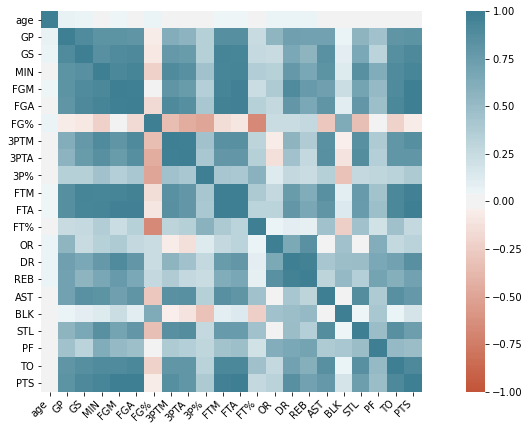

In [93]:
corr = players.corr()
plt.figure(figsize=[16,7])
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Hierarchical Clustering

In [112]:
p2 = players.T.rename(columns=players.T.iloc[0]).iloc[2:]

In [116]:
players

,name,position,age,GP,GS,MIN,FGM,FGA,FG%,3PTM,...,FT%,OR,DR,REB,AST,BLK,STL,PF,TO,PTS
0,Jaylen Brown,SG,-0.809125,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,...,-0.481582,0.212810,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
1,Jarrett Allen,C,-1.053407,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,...,-0.481582,0.212810,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
2,RJ Barrett,SG,-1.541972,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,...,-0.481582,0.212810,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
3,Ryan Broekhoff,SG,0.900852,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,...,-0.481582,0.212810,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
4,OG Anunoby,SF,-0.809125,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,...,-0.481582,0.212810,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Russell Westbrook,PG,1.145134,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,...,-0.481582,0.212810,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
502,Taurean Prince,PF,-0.076278,-0.789786,-0.665189,-0.886758,-0.848291,-0.598751,-1.120937,-0.136747,...,-0.438831,-0.842895,-1.034973,-1.056521,-0.657706,-1.150371,-0.819565,-1.174807,-0.962929,-0.762567
503,Johnathan Williams,F,-0.320560,-0.789786,-0.665189,-0.886758,-0.848291,-0.598751,-1.120937,-0.136747,...,-0.438831,-0.842895,-1.034973,-1.056521,-0.657706,-1.150371,-0.819565,-1.174807,-0.962929,-0.762567
504,Garrett Temple,SG,1.877981,-0.921836,-0.665189,-1.404663,-0.598649,-0.933178,2.603062,-1.027656,...,-2.939763,-0.993710,-0.327912,-0.608876,-1.000869,0.630803,-1.288948,-1.017586,-0.962929,-0.762567


In [107]:
import scipy.cluster.hierarchy as shc

In [145]:
players = players.set_index('name')

In [146]:
players.iloc[:,1:]

,age,GP,GS,MIN,FGM,FGA,FG%,3PTM,3PTA,3P%,...,FT%,OR,DR,REB,AST,BLK,STL,PF,TO,PTS
name,,,,,,,,,,,,,,,,,,,,,
Jaylen Brown,-0.809125,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,0.967038,0.643072,...,-0.481582,0.212810,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
Jarrett Allen,-1.053407,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,0.967038,0.643072,...,-0.481582,0.212810,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
RJ Barrett,-1.541972,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,0.967038,0.643072,...,-0.481582,0.212810,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
Ryan Broekhoff,0.900852,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,0.967038,0.643072,...,-0.481582,0.212810,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
OG Anunoby,-0.809125,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,0.967038,0.643072,...,-0.481582,0.212810,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Russell Westbrook,1.145134,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,0.967038,0.643072,...,-0.481582,0.212810,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
Taurean Prince,-0.076278,-0.789786,-0.665189,-0.886758,-0.848291,-0.598751,-1.120937,-0.136747,0.026461,0.206674,...,-0.438831,-0.842895,-1.034973,-1.056521,-0.657706,-1.150371,-0.819565,-1.174807,-0.962929,-0.762567
Johnathan Williams,-0.320560,-0.789786,-0.665189,-0.886758,-0.848291,-0.598751,-1.120937,-0.136747,0.026461,0.206674,...,-0.438831,-0.842895,-1.034973,-1.056521,-0.657706,-1.150371,-0.819565,-1.174807,-0.962929,-0.762567


Ward's method is the distance between two clusters how much the sum of squares will increase when merging the two clusters. Take center of cluster j and n is the number of points in the cluster j. We have a merging cost combine the clusters A and B.  Minimize the variance of the clusters being merged.
Ref:https://www.stat.cmu.edu/~cshalizi/350/lectures/08/lecture-08.pdf

Ward - uses Ward Variance minimization algorithm -
The clusters are merged if the increase in the combined variance over the sum of the cluster-specific variances is the minimum compared to alternative merging operations.

single - nearest point algorithm 
complete - farthest point algorithm



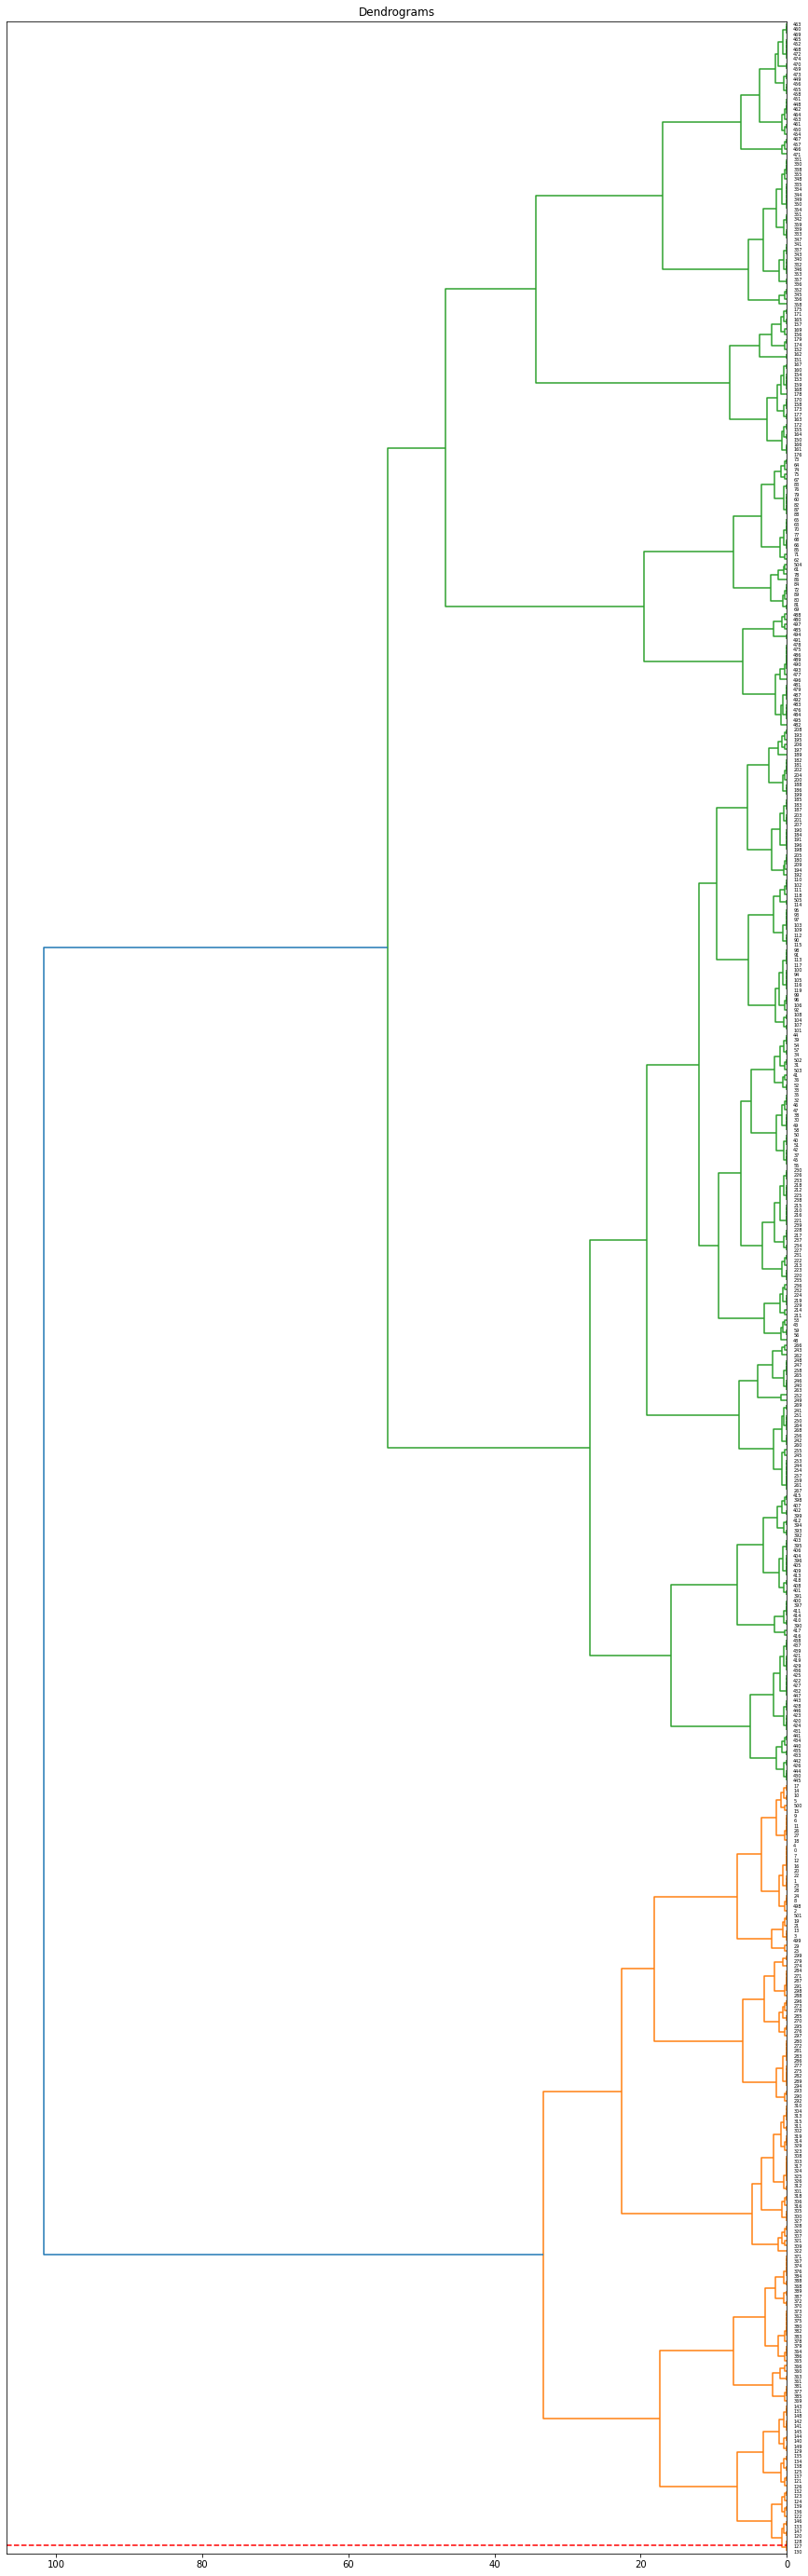

In [158]:
plt.figure(figsize=(15, 50))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(players.iloc[:,1:], method='ward'), orientation="left")
plt.axhline(y=16, color='r', linestyle='--')
plt.show()

In [166]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(players.iloc[:,1:])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [167]:
players[:30]

,position,age,GP,GS,MIN,FGM,FGA,FG%,3PTM,3PTA,...,FT%,OR,DR,REB,AST,BLK,STL,PF,TO,PTS
name,,,,,,,,,,,,,,,,,,,,,
Jaylen Brown,SG,-0.809125,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,0.967038,...,-0.481582,0.21281,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
Jarrett Allen,C,-1.053407,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,0.967038,...,-0.481582,0.21281,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
RJ Barrett,SG,-1.541972,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,0.967038,...,-0.481582,0.21281,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
Ryan Broekhoff,SG,0.900852,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,0.967038,...,-0.481582,0.21281,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
OG Anunoby,SF,-0.809125,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,0.967038,...,-0.481582,0.21281,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
Ryan Arcidiacono,PG,-0.076278,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,0.967038,...,-0.481582,0.21281,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
Jordan Bell,PF,-0.320560,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,0.967038,...,-0.481582,0.21281,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
Jordan Bone,PG,-0.809125,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,0.967038,...,-0.481582,0.21281,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422
Goga Bitadze,C,-1.297690,0.275417,0.294062,0.925908,1.048992,0.939611,0.017403,1.051132,0.967038,...,-0.481582,0.21281,0.929084,0.734058,-0.108646,-0.437901,0.588584,1.183507,0.763767,0.964422


In [162]:
players.iloc[4]

position           SF
age         -0.809125
GP           0.275417
GS           0.294062
MIN          0.925908
FGM           1.04899
FGA          0.939611
FG%         0.0174029
3PTM          1.05113
3PTA         0.967038
3P%          0.643072
FTM          0.478192
FTA          0.844808
FT%         -0.481582
OR            0.21281
DR           0.929084
REB          0.734058
AST         -0.108646
BLK         -0.437901
STL          0.588584
PF            1.18351
TO           0.763767
PTS          0.964422
Name: OG Anunoby, dtype: object

In [163]:
players.iloc[0]

position           SG
age         -0.809125
GP           0.275417
GS           0.294062
MIN          0.925908
FGM           1.04899
FGA          0.939611
FG%         0.0174029
3PTM          1.05113
3PTA         0.967038
3P%          0.643072
FTM          0.478192
FTA          0.844808
FT%         -0.481582
OR            0.21281
DR           0.929084
REB          0.734058
AST         -0.108646
BLK         -0.437901
STL          0.588584
PF            1.18351
TO           0.763767
PTS          0.964422
Name: Jaylen Brown, dtype: object

In [155]:
all_stats_df.iloc[:22]

,name,href,uid,guid,id,height,weight,age,position,jersey,...,FT%,OR,DR,REB,AST,BLK,STL,PF,TO,PTS
0,Jaylen Brown,https://www.espn.com/nba/player/_/id/3917376/j...,s:40~l:46~a:3917376,0d5cde01f6d3225fdae544ef3304cda2,3917376,78.0,223.0,23,SG,7.0,...,67.8,0.9,3.6,4.5,1.4,0.3,0.9,2.4,1.5,13.1
1,Jarrett Allen,https://www.espn.com/nba/player/_/id/4066328/j...,s:40~l:46~a:4066328,2c854df9a5a000969a6ec13cefab21d0,4066328,83.0,243.0,22,C,31.0,...,67.8,0.9,3.6,4.5,1.4,0.3,0.9,2.4,1.5,13.1
2,RJ Barrett,https://www.espn.com/nba/player/_/id/4395625/r...,s:40~l:46~a:4395625,92d6ee441fccf0585b219c8dc7d2efde,4395625,78.0,214.0,20,SG,9.0,...,67.8,0.9,3.6,4.5,1.4,0.3,0.9,2.4,1.5,13.1
3,Ryan Broekhoff,https://www.espn.com/nba/player/_/id/2489693/r...,s:40~l:46~a:2489693,731acf05f369204b0f0f599d0902df89,2489693,78.0,215.0,30,SG,45.0,...,67.8,0.9,3.6,4.5,1.4,0.3,0.9,2.4,1.5,13.1
4,OG Anunoby,https://www.espn.com/nba/player/_/id/3934719/o...,s:40~l:46~a:3934719,31ec117d6e14d4f094149d2467197179,3934719,79.0,232.0,23,SF,3.0,...,67.8,0.9,3.6,4.5,1.4,0.3,0.9,2.4,1.5,13.1
5,Ryan Arcidiacono,https://www.espn.com/nba/player/_/id/2991047/r...,s:40~l:46~a:2991047,94e5307f37c4541f3491eef33255c48c,2991047,75.0,195.0,26,PG,51.0,...,67.8,0.9,3.6,4.5,1.4,0.3,0.9,2.4,1.5,13.1
6,Jordan Bell,https://www.espn.com/nba/player/_/id/3064427/j...,s:40~l:46~a:3064427,8ef3f32a8908a3104563271d79ac1c9f,3064427,80.0,216.0,25,PF,5.0,...,67.8,0.9,3.6,4.5,1.4,0.3,0.9,2.4,1.5,13.1
7,Jordan Bone,https://www.espn.com/nba/player/_/id/4066212/j...,s:40~l:46~a:4066212,3decf4dd5dc8950b75f11d9b35533340,4066212,75.0,180.0,23,PG,18.0,...,67.8,0.9,3.6,4.5,1.4,0.3,0.9,2.4,1.5,13.1
8,Goga Bitadze,https://www.espn.com/nba/player/_/id/4348700/g...,s:40~l:46~a:4348700,da823cfca5b0d5e844c819017b7cd254,4348700,83.0,250.0,21,C,88.0,...,67.8,0.9,3.6,4.5,1.4,0.3,0.9,2.4,1.5,13.1
9,Giannis Antetokounmpo,https://www.espn.com/nba/player/_/id/3032977/g...,s:40~l:46~a:3032977,00985054c4b34247e825ddf062d457c3,3032977,83.0,242.0,25,PF,34.0,...,67.8,0.9,3.6,4.5,1.4,0.3,0.9,2.4,1.5,13.1


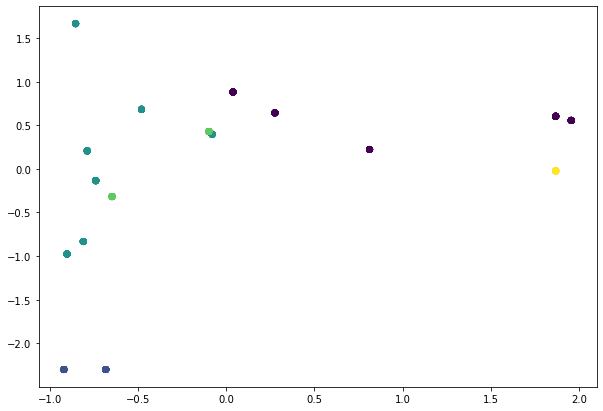

In [129]:
plt.figure(figsize=(10, 7))  
plt.scatter(players.iloc[:,2:]['GP'], players.iloc[:,2:]['3P%'], c=cluster.labels_) 